In [172]:
import pandas as pd

movies_df = pd.read_csv('movies.dat', sep='::', encoding='latin-1', names=['MovieID', 'Title', 'Genres'], engine='python')
ratings_df = pd.read_csv('ratings.dat', sep='::', encoding='latin-1', names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python')
users_df = pd.read_csv('users.dat', sep='::', encoding='latin-1', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], engine='python')

In [173]:
merged_df = pd.merge(pd.merge(ratings_df, users_df), movies_df)

In [174]:
age = [1, 18, 25, 35, 45, 50, 56]
def top_10_movies_by_rating(gender):
    results = {}

    for i, ageGroup in enumerate(age):
        filtered_data = merged_df[(merged_df['Gender'] == gender) & (merged_df['Age'] == ageGroup)]
        
        sum_ratings = filtered_data.groupby('MovieID')['Rating'].count()

        movies = sum_ratings[sum_ratings >= 20].index.tolist()
        filtered_movies = filtered_data[filtered_data['MovieID'].isin(movies)]
    
        rating = filtered_movies.groupby(['Title'])['Rating'].mean().nlargest(10).reset_index()

        results[f'{age[i]}'] = rating

    return results

In [175]:
female_1 = top_10_movies_by_rating('F')['1']

top_10_movies_by_rating('F')['1']



,Title,Rating
0,"Wizard of Oz, The (1939)",4.360000
1,Mary Poppins (1964),4.318182
2,Shakespeare in Love (1998),4.272727
3,"Princess Bride, The (1987)",4.238095
4,"Sixth Sense, The (1999)",4.225806
5,Toy Story 2 (1999),4.222222
6,Erin Brockovich (2000),4.190476
7,Willy Wonka and the Chocolate Factory (1971),4.166667
8,Star Wars: Episode IV - A New Hope (1977),4.160000
9,"Lion King, The (1994)",4.080000


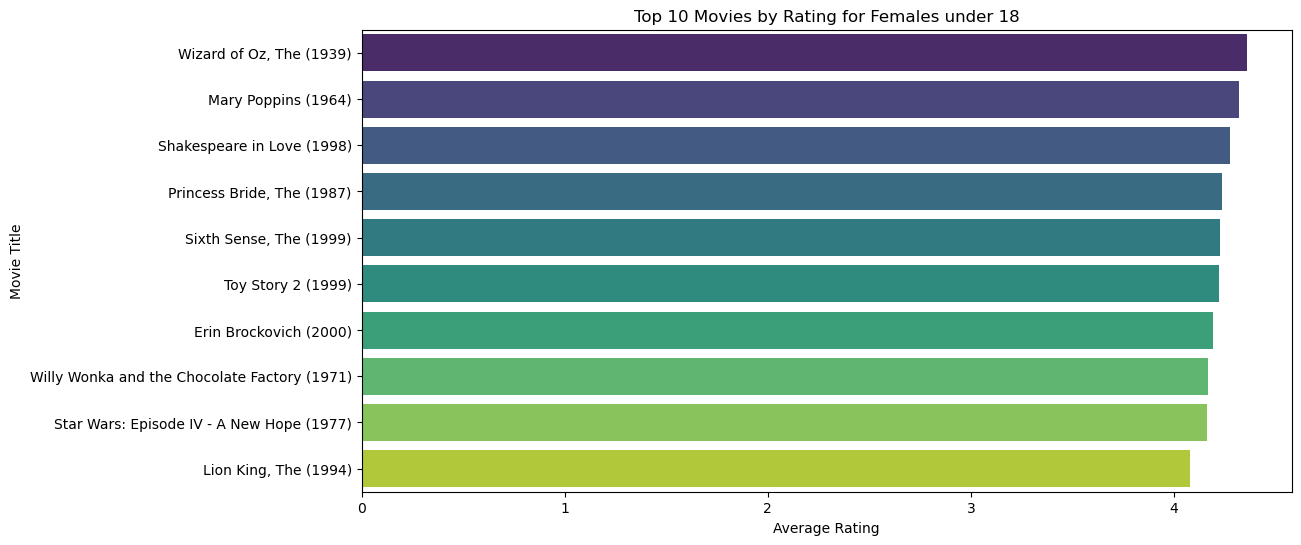

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.barplot(x='Rating', y='Title', data=female_1, palette='viridis')

plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Rating for Females under 18')

plt.show()